In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
# 2. Load Data
train_df = pd.read_csv('../DATA/train.csv')
test_df = pd.read_csv('../DATA/test.csv')

print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)


Train Shape: (891, 12)
Test Shape: (418, 11)


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
print(f" training data missing value=\n{train_df.isnull().sum()}")
print(f" testing data missing value=\n{test_df.isnull().sum()}")

 training data missing value=
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 testing data missing value=
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [20]:
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
train_df.isnull().sum()

C:\Users\parth\AppData\Local\Temp\ipykernel_24824\2566871949.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Survival Count')

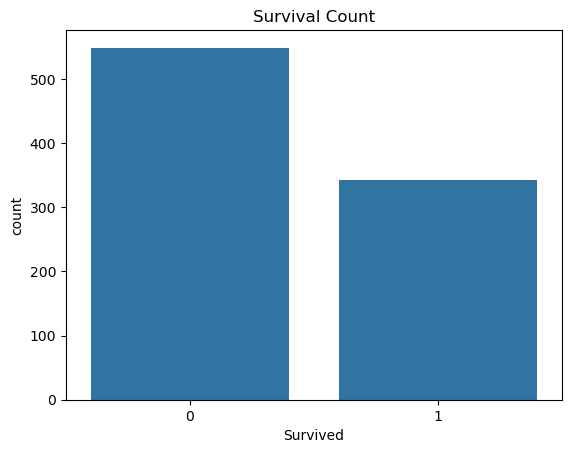

In [5]:
# 5. Target Distribution
sns.countplot(data=train_df, x='Survived')
plt.title("Survival Count")


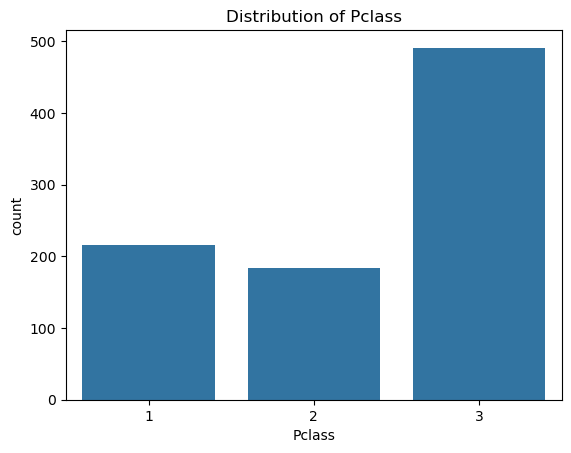

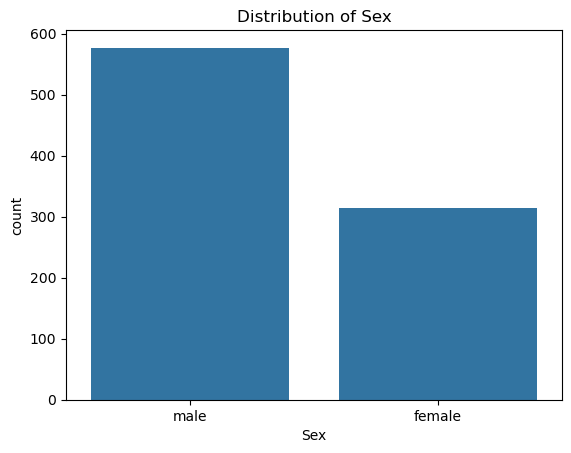

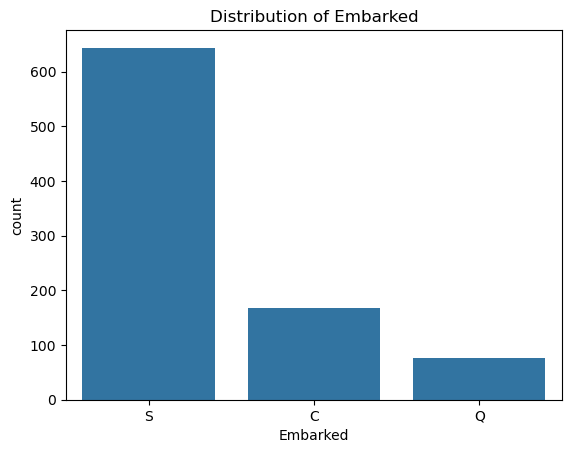

In [6]:
# 6. Categorical Feature Distributions
categorical = ['Pclass', 'Sex', 'Embarked']
for col in categorical:
    sns.countplot(data=train_df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()


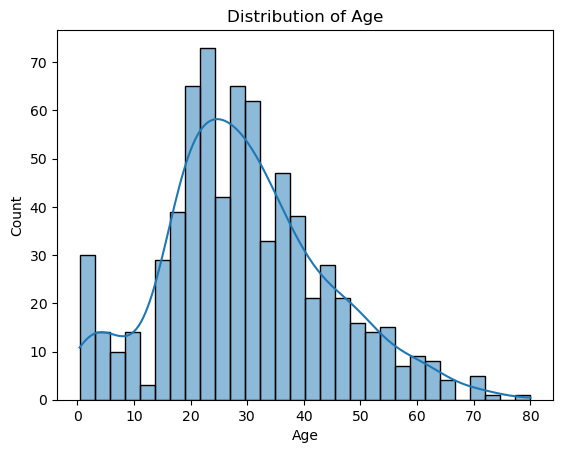

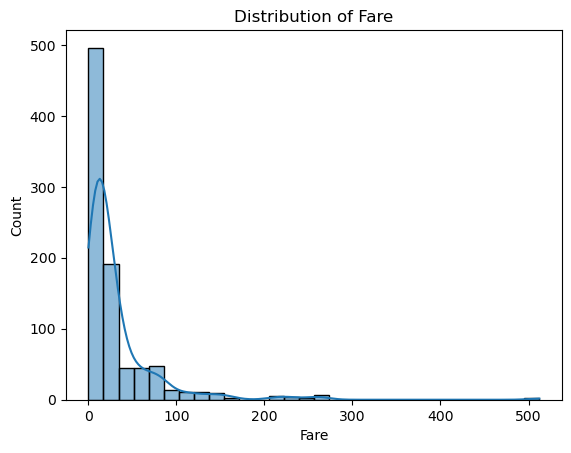

In [12]:
# 7. Numerical Feature Distributions
numerical = ['Age', 'Fare']
for col in numerical:
    sns.histplot(train_df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


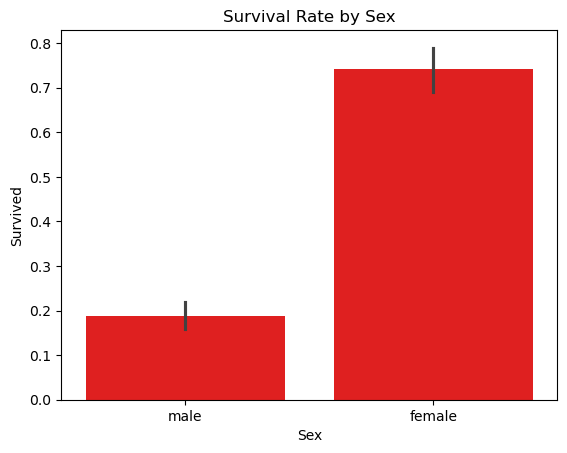

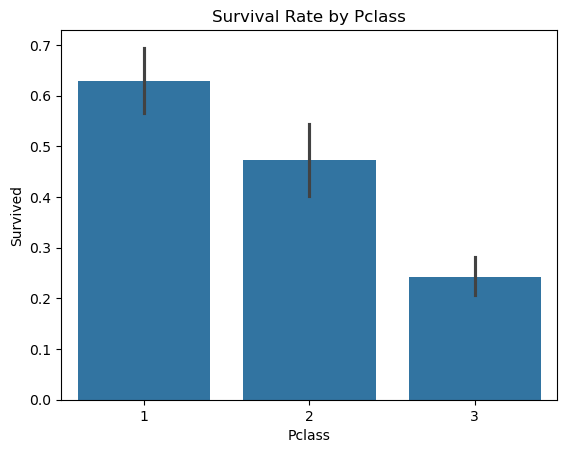

C:\Users\parth\AppData\Local\Temp\ipykernel_24824\355203231.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=train_df,palette='Set2')


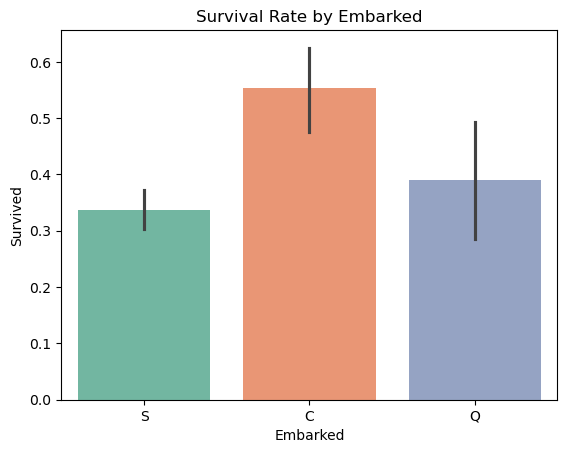

In [15]:
# 8. Survival Rate by Categorical Features

# Survival vs Sex
sns.barplot(x='Sex', y='Survived', data=train_df,color='red')
plt.title("Survival Rate by Sex")
plt.show()

# Survival vs Pclass
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title("Survival Rate by Pclass")
plt.show()

# Survival vs Embarked
sns.barplot(x='Embarked', y='Survived', data=train_df,palette='Set2')
plt.title("Survival Rate by Embarked")
plt.show()


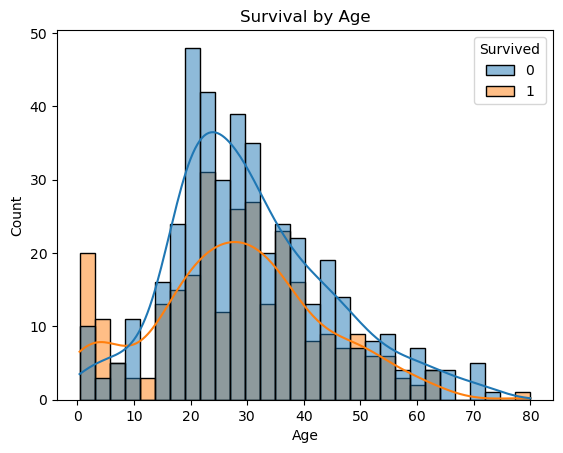

In [16]:
# 9. Survival Rate by Age
sns.histplot(data=train_df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Survival by Age")
plt.show()


In [17]:
# 10. Correlation Matrix (Train Only)
corr = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'